In [1]:
import tensorflow as tf

/home/srgrace/PycharmProjects/generic-venv/py3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/srgrace/PycharmProjects/generic-venv/py3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/srgrace/PycharmProjects/generic-venv/py3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

## tf constants

In [2]:
const1 = tf.constant([[1, 2, 3], [1, 2, 3]])
const2 = tf.constant([[3, 4, 5], [3, 4, 5]])

result = tf.add(const1, const2)
print(result)

Tensor("Add:0", shape=(2, 3), dtype=int32)


In [3]:
# Initialize Session and run `result`
with tf.Session() as sess:
    output = sess.run(result)
    print(output)

[[4 6 8]
 [4 6 8]]


## tf Placeholders

In [8]:
v1 = tf.Variable(0.0)
p1 = tf.placeholder(tf.float32)
new_val = tf.add(v1, p1)
update = tf.assign(v1, new_val)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(5):
        sess.run(update, feed_dict={p1: 1.0})
    print(sess.run(v1))

5.0


## Tensorflow Ecosystem

<img src="data/tf_ecosystem.png">

## Simple Linear Regression in TensorFlow

Y = aX + b

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np

X = np.random.rand(100).astype(np.float32)
X

array([0.23970425, 0.12405927, 0.82756233, 0.8000455 , 0.6424956 ,
       0.69418573, 0.6830812 , 0.43027705, 0.81169057, 0.65737784,
       0.79931253, 0.63549465, 0.19622819, 0.48000285, 0.57440215,
       0.69027674, 0.29344305, 0.08777396, 0.01117235, 0.60205853,
       0.62036335, 0.64395887, 0.5151952 , 0.9381854 , 0.631848  ,
       0.9573856 , 0.05682935, 0.6331253 , 0.7060845 , 0.12577759,
       0.18413503, 0.5326199 , 0.90811867, 0.3998464 , 0.2865666 ,
       0.35144088, 0.28030497, 0.487845  , 0.02572992, 0.8558915 ,
       0.31451014, 0.49525052, 0.4658688 , 0.8522901 , 0.729395  ,
       0.82872427, 0.9379566 , 0.36465034, 0.50581956, 0.08261172,
       0.5227735 , 0.7101191 , 0.38360977, 0.3331334 , 0.34428898,
       0.13777469, 0.15280843, 0.6587573 , 0.5549061 , 0.43383488,
       0.907792  , 0.09502836, 0.19073947, 0.86239034, 0.13700917,
       0.9087085 , 0.49495336, 0.3364608 , 0.36729094, 0.12778948,
       0.62658465, 0.92105246, 0.5891655 , 0.1771029 , 0.29622

In [29]:
# Lets say, The slope and intercept we are looking for are respectively a=50 and b=40.

a = 50
b = 40
Y = a * X + b
Y

array([51.985214, 46.202965, 81.37811 , 80.00227 , 72.12478 , 74.70929 ,
       74.15406 , 61.513855, 80.58453 , 72.8689  , 79.96562 , 71.774734,
       49.81141 , 64.000145, 68.72011 , 74.51384 , 54.672153, 44.3887  ,
       40.558617, 70.10293 , 71.018166, 72.197945, 65.75976 , 86.90927 ,
       71.5924  , 87.86928 , 42.84147 , 71.656265, 75.30423 , 46.28888 ,
       49.206753, 66.631   , 85.40593 , 59.99232 , 54.32833 , 57.572044,
       54.015247, 64.39225 , 41.286495, 82.79457 , 55.725506, 64.76253 ,
       63.29344 , 82.6145  , 76.46975 , 81.43622 , 86.89783 , 58.232517,
       65.29098 , 44.130585, 66.13867 , 75.50595 , 59.18049 , 56.65667 ,
       57.214447, 46.888733, 47.640423, 72.93787 , 67.7453  , 61.691742,
       85.3896  , 44.75142 , 49.536972, 83.11952 , 46.85046 , 85.435425,
       64.747665, 56.82304 , 58.364548, 46.389473, 71.32923 , 86.05263 ,
       69.458275, 48.855145, 54.81135 , 62.490997, 61.261337, 50.29625 ,
       58.794006, 51.471672, 70.558495, 80.80479 , 

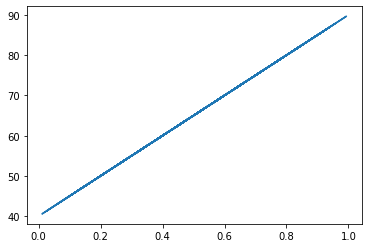

In [30]:
plt.plot(X, Y)

### Let’s make things a tiny bit more interesting by adding a bit of noise to our dependent variable.

In [32]:
Y = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.05))(Y)
a_var = tf.Variable(1.0)
b_var = tf.Variable(1.0)

y_var = a_var * X + b_var

y_var


<tf.Tensor 'add_10:0' shape=(100,) dtype=float32>

### Our task will be to minimize the mean squared error or in TensorFlow  — reduce the mean.

In [33]:
loss = tf.reduce_mean(tf.square(y_var - Y))


### So, let’s try to minimize it using gradient descent.

In [34]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

### Let’s use our optimizer for 300 steps of learning

In [35]:
TRAINING_STEPS = 300
results = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(TRAINING_STEPS):
        results.append(sess.run([train, a_var, b_var])[1:])

### Let’s get the final and best predictions for a and b

In [36]:
final_pred = results[-1]
a_hat = final_pred[0]
b_hat = final_pred[1]
y_hat = a_hat * X + b_hat

print("a:", a_hat, "b:", b_hat)

a: 49.98531 b: 40.0135


### And we have: a = 50.0, b=40.0
### Let’s compare the predicted and actual values for y

Text(0.5, 0, 'perfect fit!')

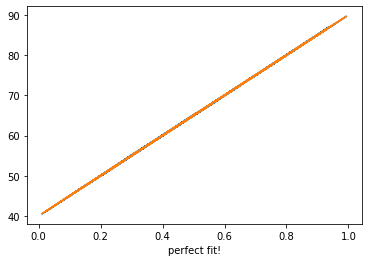

In [38]:
plt.plot(X, Y)
plt.plot(X, y_hat)
plt.xlabel('perfect fit!')

## Deep Learning with TensorFlow - Creating the Neural Network Model

### Importing the MNIST Dataset

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

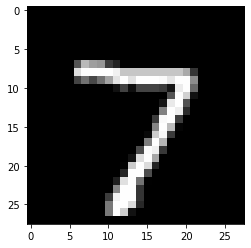

In [15]:
first_image = mnist.test.images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [44]:
n_train = mnist.train.num_examples  
n_validation = mnist.validation.num_examples 
n_test = mnist.test.num_examples  

print(n_train, n_test, n_validation)

55000 10000 5000


### Defining the Neural Network Architecture

In [45]:
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer (0-9 digits)

In [46]:
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

### Building the TensorFlow Graph

In [47]:
X = tf.placeholder("float", [None, n_input]) # any no of images with size 784 pixels
Y = tf.placeholder("float", [None, n_output]) # any no of o/p with 10 possible clasees
keep_prob = tf.placeholder(tf.float32) # used to control the dropout rate


We’ll use random values from a truncated normal distribution for the weights. We want them to be close to zero, so they can adjust in either a positive or negative direction, and slightly different, so they generate different errors. This will ensure that the model learns something useful. 

In [48]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

For the bias, we use a small constant value to ensure that the tensors activate in the intial stages and therefore contribute to the propagation.

In [49]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [50]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [51]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

### Training and Testing

In [52]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [65]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_iterations):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})

        # print loss and accuracy (per minibatch)
        if(i % 100) == 0:
            minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy],
                                                          feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0})
            
            print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), 
                  "\t| Accuracy =", str(minibatch_accuracy))
            
            
    test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
    print("\nAccuracy on test set:", test_accuracy)
            

Iteration 0 	| Loss = 3.2542048 	| Accuracy = 0.109375
Iteration 100 	| Loss = 0.55912936 	| Accuracy = 0.8125
Iteration 200 	| Loss = 0.54802763 	| Accuracy = 0.8515625
Iteration 300 	| Loss = 0.23556596 	| Accuracy = 0.921875
Iteration 400 	| Loss = 0.33342552 	| Accuracy = 0.90625
Iteration 500 	| Loss = 0.3984828 	| Accuracy = 0.9140625
Iteration 600 	| Loss = 0.34840465 	| Accuracy = 0.875
Iteration 700 	| Loss = 0.209091 	| Accuracy = 0.9375
Iteration 800 	| Loss = 0.32111278 	| Accuracy = 0.8828125
Iteration 900 	| Loss = 0.24407461 	| Accuracy = 0.9140625

Accuracy on test set: 0.9189


## Deep Learning with Keras - Creating the Neural Network Model

In [98]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [99]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

8


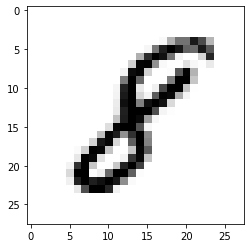

In [100]:
image_index = 7777 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

### Reshaping and Normalizing the Images
To be able to use the dataset in Keras API, we need 4-dims numpy arrays.

In [101]:
# reshape to be [samples][width][height][channels]
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# one hot encode outputs

from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


### Building the Convolutional Neural Network

In [102]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


### Compiling and Fitting the Model

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.3761 - acc: 0.8869 - val_loss: 0.0844 - val_acc: 0.9731
Epoch 2/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.0934 - acc: 0.9711 - val_loss: 0.0503 - val_acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0689 - acc: 0.9791 - val_loss: 0.0394 - val_acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0546 - acc: 0.9830 - val_loss: 0.0343 - val_acc: 0.9889
Epoch 5/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0483 - acc: 0.9845 - val_loss: 0.0325 - val_acc: 0.9896
Epoch 6/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0320 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0387 - acc: 0.9878 - val_loss: 0.

### Evaluating the Model


9


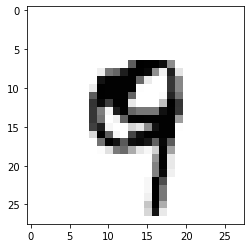

In [105]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())